In [82]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [83]:
data = pd.read_csv('ex1/ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [84]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


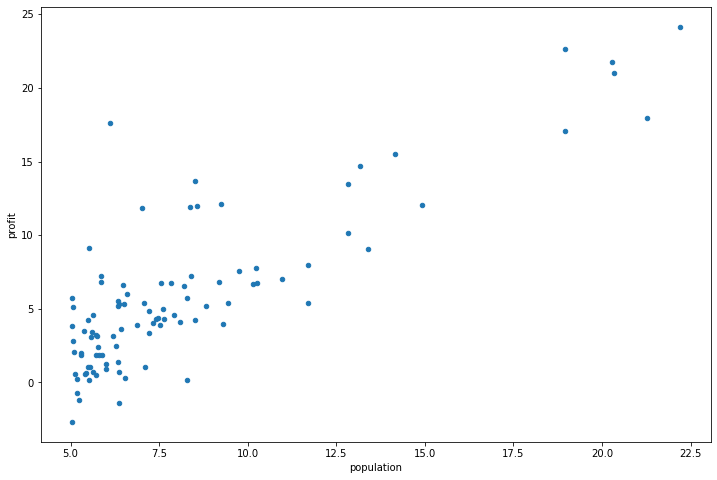

In [85]:
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()


In [86]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [87]:
#生成训练数据
X = np.matrix(data.loc[:,['ones','population']])
y = np.matrix(data.loc[:,['profit']])
theta = np.matrix(np.array([0,0]))

In [88]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [89]:
def computeCost(X,y,theta):
    inner = np.power((X * (theta.T) - y),2)
    return np.sum(inner) / (2 * len(X))

In [90]:
computeCost(X,y,theta)

32.072733877455676

In [91]:
theta

matrix([[0, 0]])

In [92]:
#批量梯度下降



In [93]:
alpha = 0.01
iters = 1000

def gradientDescend(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    history_cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        history_cost[i] = computeCost(X,y,theta)
    
    return theta,history_cost

g,history_cost = gradientDescend(X,y,theta,alpha,iters)   
g

matrix([[-3.24140214,  1.1272942 ]])

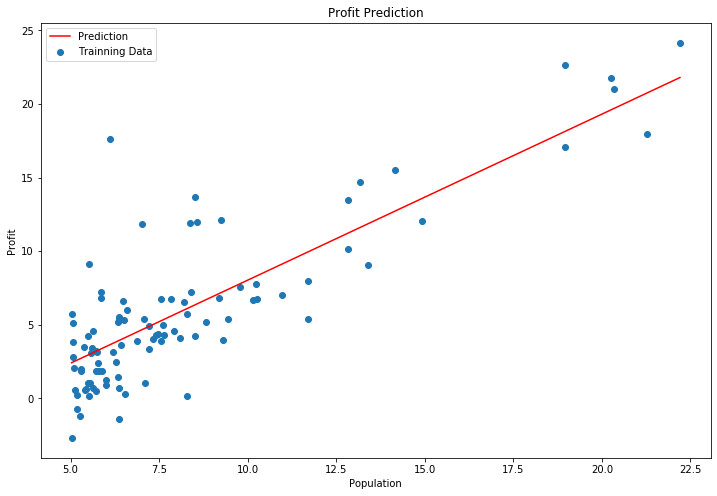

In [100]:
#绘制预测图
x = np.linspace(data.population.min(),data.population.max(),100)
y = g[0,0] + (g[0,1] * x)

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(data.population,data.profit,label='Trainning Data')
ax.plot(x,y,'r',label='Prediction')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Profit Prediction')
plt.show()

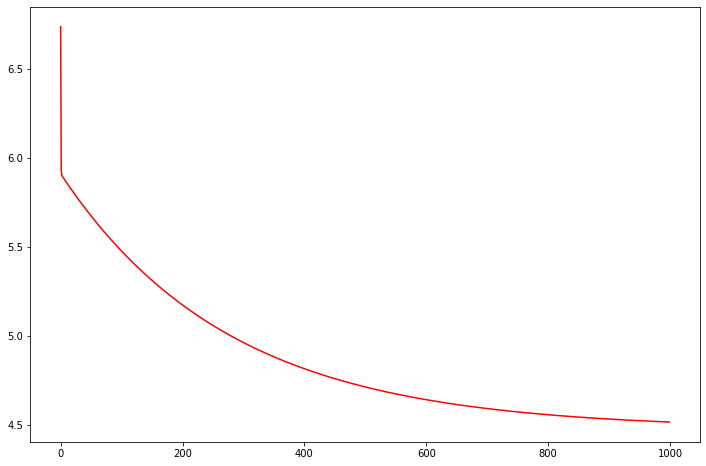

In [101]:
#绘制损失曲线
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),history_cost,'r')
plt.show()